In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
sns.set()

yvrCases = pd.read_csv('Covid-Data/yvr-modified.csv', index_col =0, parse_dates = [6])
# yvr, yvrCases
%store -r

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered,Difference,timestamp,Prediction,Month
0,0.0,NaN,"British Columbia, Canada",424,Canada,2020-03-22,10,NaN,53.7267,-127.6476,British Columbia,0,0.0,1.584835e+09,0.094065,March
1,0.0,NaN,"British Columbia, Canada",472,Canada,2020-03-23,13,NaN,53.7267,-127.6476,British Columbia,0,48.0,1.584922e+09,0.583709,March
2,0.0,NaN,"British Columbia, Canada",617,Canada,2020-03-24,13,NaN,53.7267,-127.6476,British Columbia,0,145.0,1.585008e+09,1.073353,March
3,0.0,NaN,"British Columbia, Canada",617,Canada,2020-03-25,13,NaN,53.7267,-127.6476,British Columbia,0,0.0,1.585094e+09,1.562998,March
4,0.0,NaN,"British Columbia, Canada",725,Canada,2020-03-26,14,NaN,53.7267,-127.6476,British Columbia,0,108.0,1.585181e+09,2.052642,March
5,0.0,NaN,"British Columbia, Canada",725,Canada,2020-03-27,14,NaN,53.7267,-127.6476,British Columbia,0,0.0,1.585267e+09,2.542287,March
6,0.0,NaN,"British Columbia, Canada",884,Canada,2020-03-28,17,NaN,53.7267,-127.6476,British Columbia,0,159.0,1.585354e+09,3.031931,March
7,0.0,NaN,"British Columbia, Canada",884,Canada,2020-03-29,17,NaN,53.7267,-127.6476,British Columbia,0,0.0,1.585440e+09,3.521575,March
8,0.0,NaN,"British Columbia, Canada",970,Canada,2020-03-30,19,NaN,53.7267,-127.6476,British Columbia,0,86.0,1.585526e+09,4.011220,March
9,0.0,NaN,"British Columbia, Canada",1013,Canada,2020-03-31,24,NaN,53.7267,-127.6476,British Columbia,0,43.0,1.585613e+09,4.500864,March


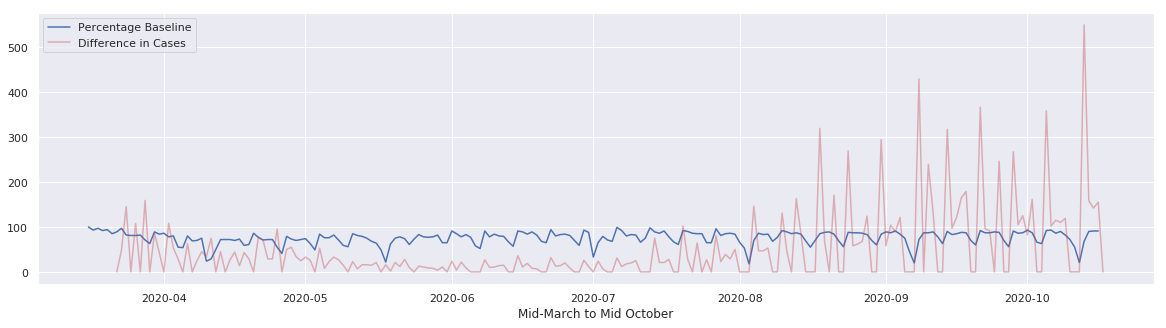

In [14]:
plt.figure(figsize = (20,5))
plt.plot(yvr["Date"], yvr['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yvrCases["Date"], yvrCases['Difference'], 'r-', label = 'Difference in Cases', alpha = 0.4)
#plt.plot(yvrCases["Date"], yvrCases['Confirmed'], 'm-', label = 'Difference in Cases', alpha = 0.4)
plt.xlabel("Mid-March to Mid October")
plt.legend()
plt.show()


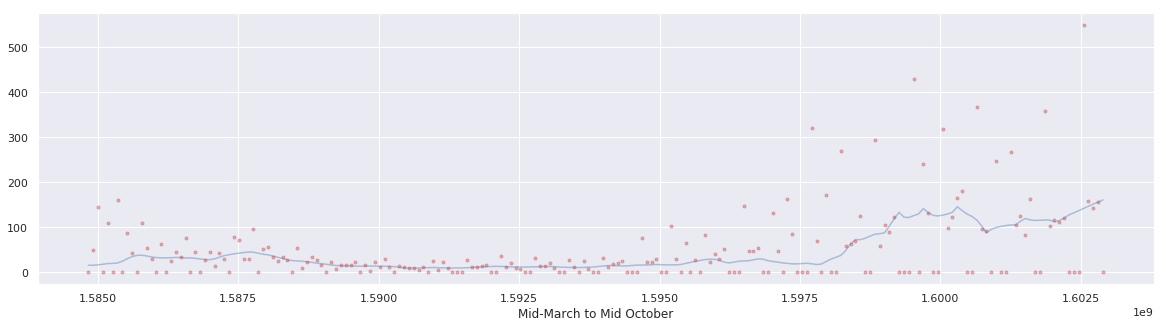

In [76]:
# We see that new cases per day is 0 sometimes, which isn't actually true, just that maybe
# the cases found for a couple of days aren't logged that day, but instead logged on another day, so we should
# smooth the new cases over a couple of days
from statsmodels.nonparametric.smoothers_lowess import lowess
new_cases_smooth = lowess(yvrCases['Difference'], yvrCases["timestamp"], frac =0.06)#,is_sorted = True, return_sorted=False)

plt.figure(figsize = (20,5))
#plt.plot(yvr["Date"], yvr['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(new_cases_smooth[:,0], new_cases_smooth[:,1], 'b-', label = 'Smoothed', alpha = 0.4)
plt.plot(yvrCases["timestamp"], yvrCases['Difference'], 'r.', label = 'New Cases', alpha = 0.4)
plt.xlabel("Mid-March to Mid October")
plt.show()

In [ ]:
temp = yvr.shift(-1)
temp["PercentOfBaseline"] = temp["PercentOfBaseline"]

X = np.array(yvr['PercentOfBaseline'].head(100)).reshape(-1, 1)
y = np.array(temp["PercentOfBaseline"].head(100)).astype(int).reshape(-1, 1)


In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(X, y)
plt.plot(X, model.predict(X), 'r-', label = "Predicted Line")
plt.plot(X, y, 'b.', label = 'Presented Data')
plt.legend()